In [1]:
import torch
torch.__version__

'2.3.0'

In [1]:
import torch
from torch import nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary


In [2]:
from pytorchcv import load_mnist, plot_results
load_mnist()

In [3]:
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 10),
    nn.LogSoftmax()
)

In [4]:
print("Digit to be predicted: ", data_train[0][1])
# 此处data_train变量是在上面的load_mnist()函数中定义的， 通过引入builtins模块，可以在函数外部访问data_train变量

Digit to be predicted:  5


In [5]:
torch.exp(net(data_train[0][0])).argmax()

c:\Users\hongx\anaconda3\envs\nn1\lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor(1)

In [60]:
train_loader = torch.utils.data.DataLoader(data_train, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(data_test, batch_size=64, shuffle=False)

In [7]:
# 以下代码的详细解读是：对于每个epoch，我们将模型的参数进行更新，然后计算损失函数的值，最后计算准确率，最后返回平均损失和准确率，这样我们就可以知道模型的性能如何了。
def train_epoch(net, train_loader, learning_rate = 0.01, optimizer = None, loss_fn = nn.NLLLoss()):
    
    optimizer = optimizer or torch.optim.Adam(net.parameters(), lr=learning_rate)
    net.train()
    total_loss, acc, count = 0,0,0
    for features, labels in train_loader:
        optimizer.zero_grad()
        out = net(features)
        loss = loss_fn(out, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss
        _, predicted = torch.max(out, 1)
        acc += (predicted == labels).sum()
        count += len(labels)
    return total_loss.item()/count, acc.item()/count

train_epoch(net, train_loader)

(0.011544532267252603, 0.8962666666666667)

In [25]:
train_epoch(net, train_loader)

(0.010196766153971354, 0.9167166666666666)

In [8]:
def validate(net, dataloader, loss_fn = nn.NLLLoss()):
    net.eval()
    count, acc, loss = 0,0,0
    with torch.no_grad():
        for features, label in dataloader:
            out = net(features)
            loss += loss_fn(out, label)
            # torch.max()输出的结果中，第一个元素是最大值，第二个元素是最大值的索引
            pred = torch.max(out, 1)[1]
            acc += (pred == label).sum()
            count += len(label)
        return loss.item() / count, acc.item() / count



In [9]:
validate(net, test_loader)

c:\Users\hongx\anaconda3\envs\nn1\lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


(0.005020671463012695, 0.9193)

In [11]:
def train(net, train_loader, test_loader, optimizer = None, learning_rate = 0.01, epochs = 10, loss_fn=nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(net.parameters(), lr = learning_rate)
    res = { "train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}
    for ep in range(epochs):
        train_loss, train_acc = train_epoch(net, train_loader, optimizer = optimizer, loss_fn = loss_fn)
        test_loss, test_acc = validate(net, test_loader, loss_fn = loss_fn)
        print(f"Epoch {ep}, Train acc: {train_acc:.3f}, Test acc: {test_acc:.3f}, Train loss: {train_loss:.3f}, Test loss: {test_loss:.3f}")
        res["train_loss"].append(train_loss)
        res["train_acc"].append(train_acc)
        res["test_loss"].append(test_loss)
        res["test_acc"].append(test_acc)
    return res

net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 10),
    nn.LogSoftmax()
)


In [21]:
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 192),
    nn.LayerNorm(192),
    nn.ReLU(),
    nn.Linear(192, 64),
    nn.LayerNorm(64),
    nn.ReLU(),
    nn.Linear(64, 10),
    # nn.ReLU(),
    nn.LogSoftmax()
)

In [22]:
hist = train(net, train_loader, test_loader, epochs=5)

c:\Users\hongx\anaconda3\envs\nn1\lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch 0, Train acc: 0.933, Test acc: 0.965, Train loss: 0.007, Test loss: 0.002
Epoch 1, Train acc: 0.967, Test acc: 0.967, Train loss: 0.003, Test loss: 0.002
Epoch 2, Train acc: 0.976, Test acc: 0.973, Train loss: 0.002, Test loss: 0.001
Epoch 3, Train acc: 0.980, Test acc: 0.971, Train loss: 0.002, Test loss: 0.001
Epoch 4, Train acc: 0.982, Test acc: 0.975, Train loss: 0.002, Test loss: 0.001


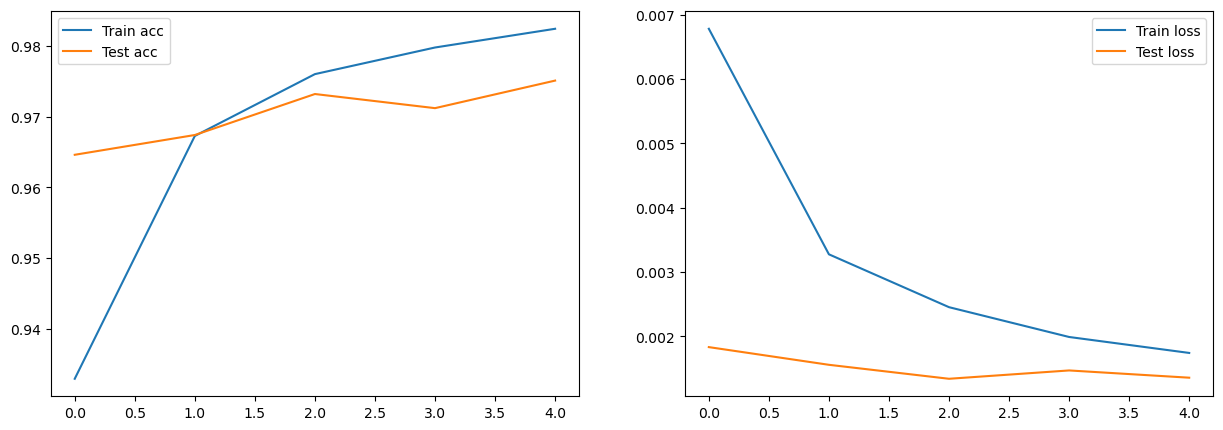

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) # 1行2列的第一个位置
plt.plot(hist["train_acc"], label="Train acc")
plt.plot(hist["test_acc"], label="Test acc")
plt.legend() # 显示图例
plt.subplot(122) # 1行2列的第二个位置
plt.plot(hist["train_loss"], label="Train loss")
plt.plot(hist["test_loss"], label="Test loss")
plt.legend()


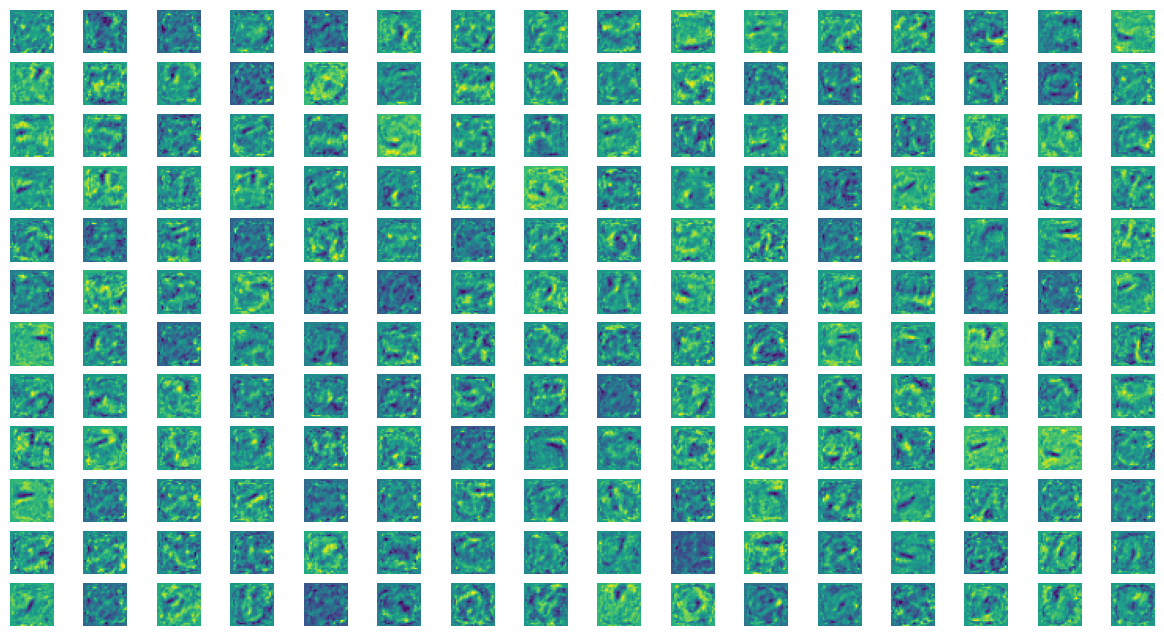

In [37]:
weight_tensor = next(net.parameters())
fig, ax = plt.subplots(12, 16, figsize=(15,8))
for i, x in enumerate(weight_tensor):
    row, col = divmod(i, 16)
    ax[row, col].imshow(x.detach().view(28, 28))
    ax[row, col].axis("off")

In [45]:
params = net.parameters()
print(next(params).shape)
print(next(params).shape)

torch.Size([192, 784])
torch.Size([192])


In [46]:
summary(net, input_size=(32, 1, 28, 28))

c:\Users\hongx\anaconda3\envs\nn1\lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 10]                  --
├─Flatten: 1-1                           [32, 784]                 --
├─Linear: 1-2                            [32, 192]                 150,720
├─LayerNorm: 1-3                         [32, 192]                 384
├─ReLU: 1-4                              [32, 192]                 --
├─Linear: 1-5                            [32, 64]                  12,352
├─LayerNorm: 1-6                         [32, 64]                  128
├─ReLU: 1-7                              [32, 64]                  --
├─Linear: 1-8                            [32, 10]                  650
├─LogSoftmax: 1-9                        [32, 10]                  --
Total params: 164,234
Trainable params: 164,234
Non-trainable params: 0
Total mult-adds (M): 5.26
Input size (MB): 0.10
Forward/backward pass size (MB): 0.13
Params size (MB): 0.66
Estimated Total Size (MB): 0.89

In [47]:
# 另一种形式
from torch.nn.functional import relu, log_softmax
class SmallNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(28 * 28, 192)
        self.out = nn.Linear(192, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = relu(x)
        x = self.out(x)
        x = log_softmax(x, dim=0) # dim=0表示对每一列进行softmax, 因为我们的输出是10个类别，而此处输入的x，根据out层的定义，shape是(192, 10)
        return x


In [61]:
net = SmallNet()
summary(net, input_size=(32, 1, 28, 28), device="cpu")

Layer (type:depth-idx)                   Output Shape              Param #
SmallNet                                 [32, 10]                  --
├─Flatten: 1-1                           [32, 784]                 --
├─Linear: 1-2                            [32, 192]                 150,720
├─Linear: 1-3                            [32, 10]                  1,930
Total params: 152,650
Trainable params: 152,650
Non-trainable params: 0
Total mult-adds (M): 4.88
Input size (MB): 0.10
Forward/backward pass size (MB): 0.05
Params size (MB): 0.61
Estimated Total Size (MB): 0.76

In [62]:
hist = train(net, train_loader, test_loader, epochs=5)


Epoch 0, Train acc: 0.904, Test acc: 0.948, Train loss: 0.051, Test loss: 0.034
Epoch 1, Train acc: 0.930, Test acc: 0.948, Train loss: 0.048, Test loss: 0.034
Epoch 2, Train acc: 0.933, Test acc: 0.950, Train loss: 0.048, Test loss: 0.033
Epoch 3, Train acc: 0.937, Test acc: 0.949, Train loss: 0.048, Test loss: 0.033
Epoch 4, Train acc: 0.937, Test acc: 0.941, Train loss: 0.047, Test loss: 0.034


In [63]:
#要想让net在GPU上运行，只需要将net和数据放到GPU上即可，代码如下：
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gpu_net = net.to(device)

# Move data to the same device as the model
gpu_train_loader = torch.utils.data.DataLoader([(x.to(device), torch.tensor(y).to(device)) for x, y in data_train], batch_size=32, shuffle=True)
gpu_test_loader = torch.utils.data.DataLoader([(x.to(device), torch.tensor(y).to(device)) for x, y in data_test], batch_size=64, shuffle=False)

In [65]:
hist = train(gpu_net, gpu_train_loader, gpu_test_loader, epochs=15)

Epoch 0, Train acc: 0.940, Test acc: 0.947, Train loss: 0.047, Test loss: 0.034
Epoch 1, Train acc: 0.940, Test acc: 0.953, Train loss: 0.047, Test loss: 0.034
Epoch 2, Train acc: 0.942, Test acc: 0.943, Train loss: 0.047, Test loss: 0.034
Epoch 3, Train acc: 0.942, Test acc: 0.951, Train loss: 0.047, Test loss: 0.034
Epoch 4, Train acc: 0.944, Test acc: 0.947, Train loss: 0.047, Test loss: 0.034
Epoch 5, Train acc: 0.944, Test acc: 0.951, Train loss: 0.047, Test loss: 0.034
Epoch 6, Train acc: 0.944, Test acc: 0.945, Train loss: 0.047, Test loss: 0.034
Epoch 7, Train acc: 0.944, Test acc: 0.943, Train loss: 0.047, Test loss: 0.034
Epoch 8, Train acc: 0.943, Test acc: 0.946, Train loss: 0.047, Test loss: 0.034
Epoch 9, Train acc: 0.945, Test acc: 0.948, Train loss: 0.046, Test loss: 0.034
Epoch 10, Train acc: 0.946, Test acc: 0.946, Train loss: 0.046, Test loss: 0.034
Epoch 11, Train acc: 0.946, Test acc: 0.943, Train loss: 0.047, Test loss: 0.034
Epoch 12, Train acc: 0.946, Test acc: 